# 简单的车道线检测（视频版）

##### 此notebook为首次尝试，主要目的熟悉使用opencv对图像做检测，选用了路况较为简单的高速路行车记录视频

In [1]:
import imageio
imageio.plugins.ffmpeg.download()
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import numpy as np
import cv2

Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)


Downloading: 8192/28549024 bytes (0.016384/28549024 bytes (0.1%24576/28549024 bytes (0.1%40960/28549024 bytes (0.1%90112/28549024 bytes (0.3%106496/28549024 bytes (0.4188416/28549024 bytes (0.7237568/28549024 bytes (0.8270336/28549024 bytes (0.9286720/28549024 bytes (1.0516096/28549024 bytes (1.8679936/28549024 bytes (2.4696320/28549024 bytes (2.4745472/28549024 bytes (2.6778240/28549024 bytes (2.7876544/28549024 bytes (3.1892928/28549024 bytes (3.1909312/28549024 bytes (3.2925696/28549024 bytes (3.21040384/28549024 bytes (3.6%1089536/28549024 bytes (3.8%1122304/28549024 bytes (3.9%1155072/28549024 bytes (4.0%1236992/28549024 bytes (4.3%1253376/28549024 bytes (4.4%1286144/28549024 bytes (4.5%1302528/28549024 bytes (4.6%1335296/28549024 bytes (4.7%1351680/28549024 bytes (4.7%1384448/28549024 bytes (4.8%1417216/28549024 bytes (5.0%1449984/28549024 bytes (5.1%1482752/28549024 bytes (5.2%1515520/28549024 bytes (5.3%1564672/28549024 bytes (5.5%1581056/28549024 bytes (5.5%1630208/28549024 by

7979008/28549024 bytes (27.97995392/28549024 bytes (28.08003584/28549024 bytes (28.08019968/28549024 bytes (28.18036352/28549024 bytes (28.18052736/28549024 bytes (28.28069120/28549024 bytes (28.38101888/28549024 bytes (28.48118272/28549024 bytes (28.48151040/28549024 bytes (28.68167424/28549024 bytes (28.68200192/28549024 bytes (28.78224768/28549024 bytes (28.88241152/28549024 bytes (28.98265728/28549024 bytes (29.08298496/28549024 bytes (29.18314880/28549024 bytes (29.18347648/28549024 bytes (29.28380416/28549024 bytes (29.48413184/28549024 bytes (29.58429568/28549024 bytes (29.58503296/28549024 bytes (29.88527872/28549024 bytes (29.98577024/28549024 bytes (30.08593408/28549024 bytes (30.18609792/28549024 bytes (30.28626176/28549024 bytes (30.28642560/28549024 bytes (30.38658944/28549024 bytes (30.38675328/28549024 bytes (30.48708096/28549024 bytes (30.58732672/28549024 bytes (30.68757248/28549024 bytes (30.78790016/28549024 bytes (30.88822784/28549024 bytes (30.98855552/28549024 byt

Downloading: 8192/28549024 bytes (0.016384/28549024 bytes (0.1%40960/28549024 bytes (0.1%73728/28549024 bytes (0.3%81920/28549024 bytes (0.3%147456/28549024 bytes (0.5163840/28549024 bytes (0.6360448/28549024 bytes (1.3376832/28549024 bytes (1.3507904/28549024 bytes (1.8573440/28549024 bytes (2.0606208/28549024 bytes (2.1655360/28549024 bytes (2.3688128/28549024 bytes (2.4737280/28549024 bytes (2.6786432/28549024 bytes (2.8835584/28549024 bytes (2.9884736/28549024 bytes (3.1933888/28549024 bytes (3.3999424/28549024 bytes (3.51032192/28549024 bytes (3.6%1081344/28549024 bytes (3.8%1130496/28549024 bytes (4.0%1179648/28549024 bytes (4.1%1228800/28549024 bytes (4.3%1277952/28549024 bytes (4.5%1310720/28549024 bytes (4.6%1359872/28549024 bytes (4.8%1409024/28549024 bytes (4.9%1458176/28549024 bytes (5.1%1507328/28549024 bytes (5.3%1556480/28549024 bytes (5.5%1605632/28549024 bytes (5.6%1638400/28549024 bytes (5.7%1687552/28549024 bytes (5.9%1753088/28549024 bytes (6.1%1785856/28549024 byte

9502720/28549024 bytes (33.39519104/28549024 bytes (33.39535488/28549024 bytes (33.49551872/28549024 bytes (33.59568256/28549024 bytes (33.59584640/28549024 bytes (33.69601024/28549024 bytes (33.69617408/28549024 bytes (33.79650176/28549024 bytes (33.89666560/28549024 bytes (33.99682944/28549024 bytes (33.99699328/28549024 bytes (34.09715712/28549024 bytes (34.09748480/28549024 bytes (34.19781248/28549024 bytes (34.39814016/28549024 bytes (34.49830400/28549024 bytes (34.49846784/28549024 bytes (34.59863168/28549024 bytes (34.59895936/28549024 bytes (34.79912320/28549024 bytes (34.79928704/28549024 bytes (34.89945088/28549024 bytes (34.89977856/28549024 bytes (34.99994240/28549024 bytes (35.010027008/28549024 bytes (35.1%10043392/28549024 bytes (35.2%10076160/28549024 bytes (35.3%10108928/28549024 bytes (35.4%10125312/28549024 bytes (35.5%10182656/28549024 bytes (35.7%10207232/28549024 bytes (35.8%10256384/28549024 bytes (35.9%10305536/28549024 bytes (36.1%10338304/28549024 bytes (36.2%

18284544/28549024 bytes (64.0%18300928/28549024 bytes (64.1%18317312/28549024 bytes (64.2%18333696/28549024 bytes (64.2%18358272/28549024 bytes (64.3%18374656/28549024 bytes (64.4%18382848/28549024 bytes (64.4%18399232/28549024 bytes (64.4%18415616/28549024 bytes (64.5%18432000/28549024 bytes (64.6%18448384/28549024 bytes (64.6%18464768/28549024 bytes (64.7%18481152/28549024 bytes (64.7%18497536/28549024 bytes (64.8%18513920/28549024 bytes (64.8%18530304/28549024 bytes (64.9%18546688/28549024 bytes (65.0%18563072/28549024 bytes (65.0%18579456/28549024 bytes (65.1%18612224/28549024 bytes (65.2%18620416/28549024 bytes (65.2%18628608/28549024 bytes (65.3%18661376/28549024 bytes (65.4%18677760/28549024 bytes (65.4%18694144/28549024 bytes (65.5%18710528/28549024 bytes (65.5%18743296/28549024 bytes (65.7%18759680/28549024 bytes (65.7%18776064/28549024 bytes (65.8%18792448/28549024 bytes (65.8%18808832/28549024 bytes (65.9%18825216/28549024 bytes (65.9%18841600/28549024 bytes (66.0%18857984/

25329664/28549024 bytes (88.7%25378816/28549024 bytes (88.9%25411584/28549024 bytes (89.0%25444352/28549024 bytes (89.1%25493504/28549024 bytes (89.3%25559040/28549024 bytes (89.5%25608192/28549024 bytes (89.7%25640960/28549024 bytes (89.8%25690112/28549024 bytes (90.0%25722880/28549024 bytes (90.1%25772032/28549024 bytes (90.3%25804800/28549024 bytes (90.4%25853952/28549024 bytes (90.6%25870336/28549024 bytes (90.6%25935872/28549024 bytes (90.8%25985024/28549024 bytes (91.0%26034176/28549024 bytes (91.2%26083328/28549024 bytes (91.4%26116096/28549024 bytes (91.5%26165248/28549024 bytes (91.7%26198016/28549024 bytes (91.8%26247168/28549024 bytes (91.9%26296320/28549024 bytes (92.1%26329088/28549024 bytes (92.2%26378240/28549024 bytes (92.4%26427392/28549024 bytes (92.6%26476544/28549024 bytes (92.7%26509312/28549024 bytes (92.9%26558464/28549024 bytes (93.0%26591232/28549024 bytes (93.1%26640384/28549024 bytes (93.3%26673152/28549024 bytes (93.4%26689536/28549024 bytes (93.5%26755072/

## 1.原图

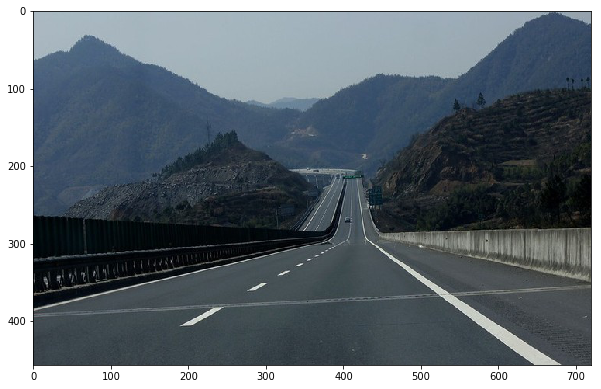

In [11]:
img = mplimg.imread('highway.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img)

## 2.灰度图

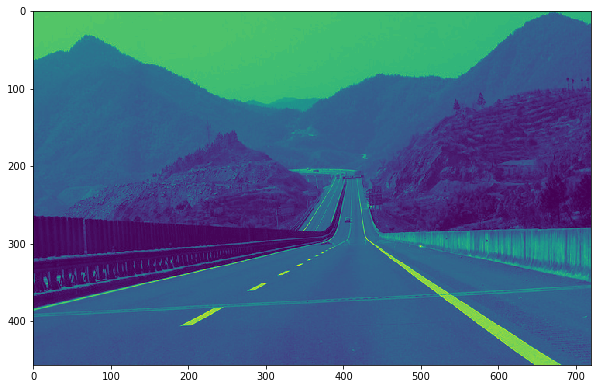

In [13]:
'''
1.灰度图读出偏绿色，原因暂未知，如下代码可获得灰色图片：
    for i in range(375):
        for j in range(1242):
            img[i,j] = (img[i,j,0]+img[i,j,1]+img[i,j,2]) / 3
    print(img)
    plt.figure(figsize=(15,5))
    plt.imshow(img)
    gray = img
2.可用cv2.cvtColor()将原图转换为灰度图，但在做Canny edge detection时会报错"src_depth() == 0 in canny function"，原因暂未知。
'''

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
darken = (gray / 3).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(darken)

## 3.高斯滤波

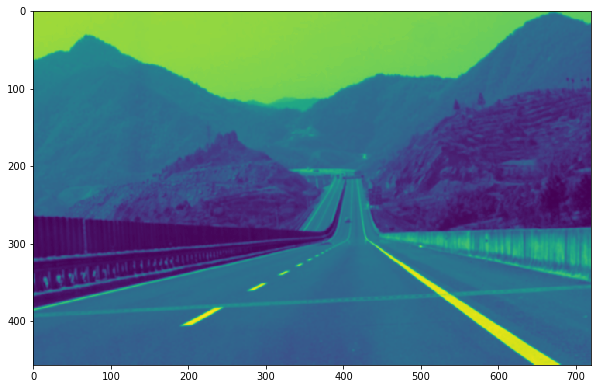

In [14]:
blur_ksize = 5
blur_gray = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0, 0)
plt.figure(figsize=(10,10))
plt.imshow(blur_gray)

## 4.Canny边界检测

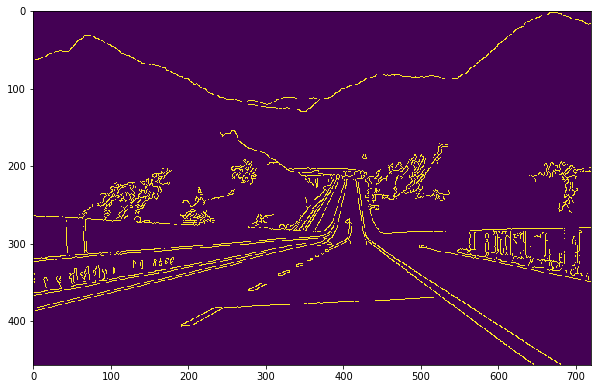

In [15]:
canny_lthreshold = 10  
canny_hthreshold = 150  
edges = cv2.Canny(blur_gray, canny_lthreshold, canny_hthreshold)
plt.figure(figsize=(10,10))
plt.imshow(edges)

## 5.Region of Interest (ROI)

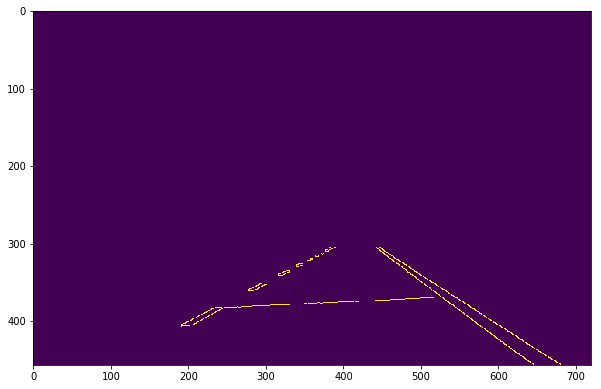

In [16]:
def roi_mask(img, vertices):
    
    mask = np.zeros_like(img)
    mask_color = 255
    cv2.fillPoly(mask,vertices,mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    
    return masked_img

roi_vertices = np.array([[(0,edges.shape[0]),
                          (380,305),
                          (450,305),
                          (edges.shape[1],edges.shape[0])]])
roi_edges = roi_mask(edges, roi_vertices)

plt.figure(figsize=(10,10))
plt.imshow(roi_edges)

## 6.Hough Transformation

(14, 1, 4)
(457, 720)


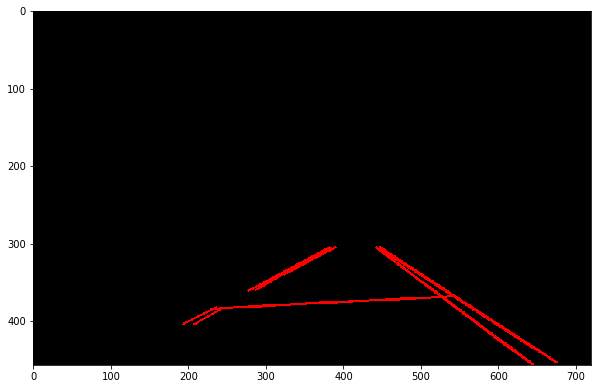

In [17]:
rho = 1
theta = np.pi/180
threshold = 15
min_line_len = 40
max_line_gap = 20

def draw_lines(img, lines, color = (255, 0, 0), thickness = 2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1,y1), (x2,y2), color, thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len, 
                            maxLineGap=max_line_gap)
    print(lines.shape)
    print(img.shape)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

line_img = hough_lines(roi_edges, rho, theta, threshold, min_line_len, max_line_gap)

plt.figure(figsize=(10,10))
plt.imshow(line_img)

## 7.对检测出的直线进行筛选和拟合

left_vtx: [(376, 310), (99, 457)]
right_vtx: [(450, 310), (657, 457)]


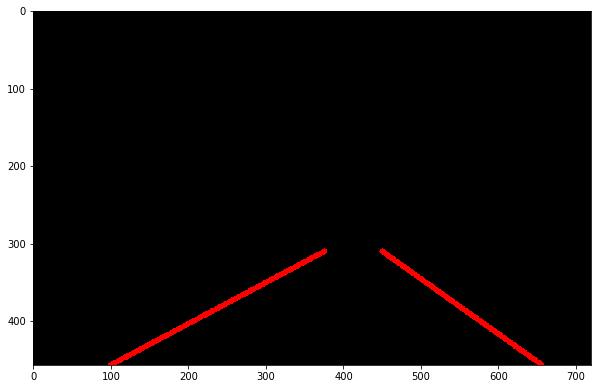

In [21]:
def draw_fit_lines(img, lines, color = (255, 0, 0), thickness = 6):
    left_lines, right_lines = [], []
    for line in lines:
        for x1,y1,x2,y2 in line:
            k = (y2 - y1) / (x2 - x1)
            if k > 0:
                right_lines.append(line)
            else:
                left_lines.append(line)
    filtrate_lines(left_lines, 0.1)
    filtrate_lines(right_lines, 0.1)
                   
    left_points = [(x1, y1) for line in left_lines for x1,y1,x2,y2 in line]
    left_points = left_points + [(x2, y2) for line in left_lines for x1,y1,x2,y2 in line]
    right_points = [(x1, y1) for line in right_lines for x1,y1,x2,y2 in line]
    right_points = right_points + [(x2, y2) for line in right_lines for x1,y1,x2,y2 in line]
                   
    left_vtx = calc_lane_vertices(left_points, 310,img.shape[0])
    right_vtx = calc_lane_vertices(right_points, 310,img.shape[0])
                   
    cv2.line(img, left_vtx[0], left_vtx[1], color, thickness)
    cv2.line(img, right_vtx[0], right_vtx[1], color, thickness)
    print('left_vtx:',left_vtx)
    print('right_vtx:',right_vtx)
def filtrate_lines(lines, threshold):
    slope = [(y2 - y1) / (x2 - x1) for line in lines for x1, y1, x2, y2 in line]
    while len(lines) > 0:
        mean = np.mean(slope)
        diff = [abs(s - mean) for s in slope]
        idx = np.argmax(diff)
        if diff[idx] > threshold:
            slope.pop(idx)
            lines.pop(idx)
        else:
            break
                   
def calc_lane_vertices(point_list, ymin, ymax):
    x = [p[0] for p in point_list]
    y = [p[1] for p in point_list]
    fit = np.polyfit(y, x, 1)
    fit_fn = np.poly1d(fit)

    xmin = int(fit_fn(ymin))
    xmax = int(fit_fn(ymax))

    return [(xmin, ymin), (xmax, ymax)]
                
fit_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
lines = cv2.HoughLinesP(roi_edges, rho, theta, threshold, np.array([]),
                        minLineLength=min_line_len, 
                        maxLineGap=max_line_gap)                  
draw_fit_lines(fit_img, lines)
                   
plt.figure(figsize=(10,10))
plt.imshow(fit_img)

## 8.与原图叠加

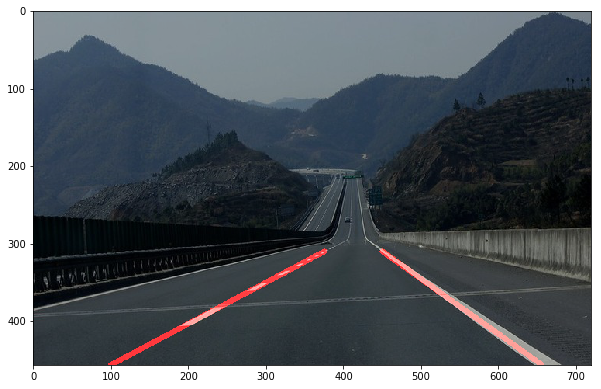

In [31]:
done_img = cv2.addWeighted(img, 0.8, fit_img, 1, 0)
plt.figure(figsize=(10,10))
plt.imshow(done_img)